In [206]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from PIL import Image
from tensorflow import keras

In [207]:
df = pd.read_csv('D:\Education\Projects\Gender-Age-Detection-using-CNN\Data\Age_Gender_DATASET.csv')

In [208]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


## EDA

In [209]:
df.isna().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [210]:
df.dtypes

age           int64
ethnicity     int64
gender        int64
img_name     object
pixels       object
dtype: object

In [211]:
df.drop('img_name', axis=1, inplace=True)

In [212]:
len(df.pixels[0])

8917

In [213]:
df.shape

(23705, 4)

## Preprocessing

In [214]:
def pixels_to_img(pixels):
    pixels = pixels.apply(lambda x: np.reshape(np.array(x.split(), dtype='uint8'), (48,48)))
    return pixels

In [215]:
df.pixels = pixels_to_img(df.pixels)

In [216]:
df.pixels /= 255.0

In [217]:
df.head()

,age,ethnicity,gender,pixels
0,1,2,0,"[[0.5058823529411764, 0.5019607843137255, 0.50..."
1,1,2,0,"[[0.6431372549019608, 0.2901960784313726, 0.43..."
2,1,2,0,"[[0.2627450980392157, 0.27450980392156865, 0.2..."
3,1,2,0,"[[0.7568627450980392, 0.7725490196078432, 0.77..."
4,1,2,0,"[[0.792156862745098, 0.803921568627451, 0.8196..."


In [218]:
GENDER = ['Male', 'Female']
ETHNICITY = ['White','Black','Indian','Asian','Hispanic']

In [219]:
def plot_imgs(n):
    plt.imshow(df.pixels[n], cmap='gray')
    plt.title(f'age: {df.age[n]}, gender: {GENDER[df.gender[n]]}, and ethnicity {ETHNICITY[df.ethnicity[n]]}')
    plt.axis('off')
    plt.show()

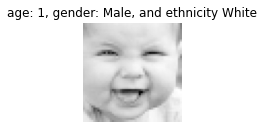

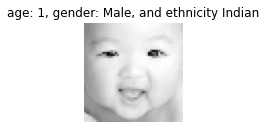

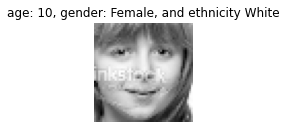

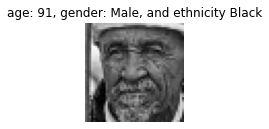

In [220]:
plt.subplot(2,2,1)
plot_imgs(412)
plt.subplot(2,2,2)
plot_imgs(10)
plt.subplot(2,2,3)
plot_imgs(1256)
plt.subplot(2,2,4)
plot_imgs(23650)

In [221]:
df.shape

(23705, 4)

In [222]:
X = np.zeros(shape=(23705,48,48))
for i in range(len(df["pixels"])):
    X[i] = df["pixels"][i]

In [223]:
age_array = np.array(df.age)

In [224]:
gender_array = np.array(df.gender)

In [225]:
X

array([[[0.50588235, 0.50196078, 0.50196078, ..., 0.4627451 ,
         0.38823529, 0.20784314],
        [0.50980392, 0.50588235, 0.50196078, ..., 0.45882353,
         0.38431373, 0.20392157],
        [0.51372549, 0.50588235, 0.50980392, ..., 0.44705882,
         0.38039216, 0.19607843],
        ...,
        [0.4745098 , 0.54117647, 0.57647059, ..., 0.59215686,
         0.58823529, 0.58039216],
        [0.45882353, 0.5372549 , 0.57254902, ..., 0.58431373,
         0.58039216, 0.58039216],
        [0.45098039, 0.52941176, 0.55686275, ..., 0.57254902,
         0.57254902, 0.57254902]],

       [[0.64313725, 0.29019608, 0.43529412, ..., 0.43529412,
         0.43529412, 0.40784314],
        [0.70196078, 0.2745098 , 0.50196078, ..., 0.43921569,
         0.44313725, 0.42352941],
        [0.69019608, 0.27843137, 0.57254902, ..., 0.43921569,
         0.43921569, 0.42745098],
        ...,
        [0.75294118, 0.76862745, 0.92156863, ..., 0.43529412,
         0.48627451, 0.43921569],
        [0.9

In [226]:
age_array

array([ 1,  1,  1, ..., 99, 99, 99], dtype=int64)

In [227]:
gender_array

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, gender_array, test_size=0.2)

In [230]:
X_train_gender.shape

(18964, 48, 48)

In [231]:
y_train_gender.shape

(18964,)

In [232]:
X_train_gender[0]

array([[0.85490196, 0.83137255, 0.8       , ..., 0.59215686, 0.54901961,
        0.56470588],
       [0.89803922, 0.8745098 , 0.85882353, ..., 0.63529412, 0.54509804,
        0.55686275],
       [0.89803922, 0.89019608, 0.84313725, ..., 0.63921569, 0.54901961,
        0.54117647],
       ...,
       [0.79215686, 0.77647059, 0.78823529, ..., 0.54117647, 0.54117647,
        0.51764706],
       [0.77254902, 0.70196078, 0.76470588, ..., 0.53333333, 0.5254902 ,
        0.50196078],
       [0.70588235, 0.75294118, 0.76470588, ..., 0.5254902 , 0.54509804,
        0.51372549]])

In [233]:
y_train_gender[0]

1

In [234]:
X_train_gender = X_train_gender.reshape(-1, 48, 48, 1)

In [235]:
X_test_gender = X_test_gender.reshape(-1, 48, 48, 1)

# CNN (Convolutional Neural Nrtwork)

In [236]:
ANN_model_gender = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
    
])

ANN_model_gender.compile(
    optimizer='adam',
    loss = keras.metrics.binary_crossentropy,
    metrics=['accuracy']
)

In [237]:
ANN_model_gender.fit(X_train_gender, y_train_gender, epochs=5)

Epoch 1/5
593/593 [==============================] - 41s 66ms/step - loss: 0.4682 - accuracy: 0.7655
Epoch 2/5
593/593 [==============================] - 40s 67ms/step - loss: 0.3423 - accuracy: 0.8456
Epoch 3/5
593/593 [==============================] - 39s 66ms/step - loss: 0.3086 - accuracy: 0.8623
Epoch 4/5
593/593 [==============================] - 39s 66ms/step - loss: 0.2861 - accuracy: 0.8748
Epoch 5/5
593/593 [==============================] - 40s 67ms/step - loss: 0.2690 - accuracy: 0.8807


In [238]:
ANN_model_gender.evaluate(X_test_gender, y_test_gender)

149/149 [==============================] - 3s 20ms/step - loss: 0.2799 - accuracy: 0.8652


[0.27990856766700745, 0.8652182817459106]

In [239]:
ANN_model_gender.predict(np.expand_dims(X_train_gender[1121],0))

array([[0.8924273]], dtype=float32)

In [240]:
y_train_gender[1121]

1

In [241]:
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X, age_array, test_size=0.2)

In [242]:
X_train_age = X_train_age.reshape(-1, 48, 48, 1)
X_test_age = X_test_age.reshape(-1, 48, 48, 1)

In [243]:
ANN_model_age = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='relu'),
    
])

ANN_model_age.compile(
    optimizer='adam',
    loss = keras.metrics.mae,
    metrics=['accuracy']
)

In [244]:
y_train_age

array([35, 27, 25, ..., 26, 22, 56], dtype=int64)

In [245]:
ANN_model_age.fit(X_train_age, y_train_age, epochs=5)

Epoch 1/5
593/593 [==============================] - 44s 70ms/step - loss: 13.3958 - accuracy: 0.0471
Epoch 2/5
593/593 [==============================] - 39s 66ms/step - loss: 9.1903 - accuracy: 0.0473
Epoch 3/5
593/593 [==============================] - 40s 67ms/step - loss: 8.1252 - accuracy: 0.0473
Epoch 4/5
593/593 [==============================] - 40s 67ms/step - loss: 7.5781 - accuracy: 0.0473
Epoch 5/5
593/593 [==============================] - 39s 66ms/step - loss: 7.2227 - accuracy: 0.0473


In [246]:
ANN_model_age.predict(np.expand_dims(X_train_age[1121],0))

array([[14.304233]], dtype=float32)

In [247]:
y_train_age[1121]

6

# Models saving

In [248]:
ANN_model_age.save('D:\Education\Projects\Gender-Age-Detection-using-CNN\Models\ANN_model_age')
ANN_model_gender.save('D:\Education\Projects\Gender-Age-Detection-using-CNN\Models\ANN_model_gender')

INFO:tensorflow:Assets written to: D:\Education\Projects\Gender-Age-Detection-using-CNN\Models\ANN_model_age\assets
INFO:tensorflow:Assets written to: D:\Education\Projects\Gender-Age-Detection-using-CNN\Models\ANN_model_gender\assets


# Testing

In [249]:
import cv2

In [280]:
test_image = keras.preprocessing.image.load_img(r'D:\Education\Projects\Gender-Age-Detection-using-CNN\oldman.jpg', grayscale=True)

In [281]:
test_image.size

(1706, 1707)

In [282]:
test_image_resized = test_image.resize((48,48))

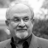

In [283]:
test_image_resized

In [284]:
test_image_resized_array = keras.preprocessing.image.img_to_array(test_image_resized)

In [285]:
test_image_resized_array_reshaped = test_image_resized_array.reshape(48,48,1)

In [286]:
test_image_resized_array_reshaped /= 255.0

In [257]:
model_age = keras.models.load_model('D:\Education\Projects\Gender-Age-Detection-using-CNN\Models\ANN_model_age')

In [258]:
model_gender = keras.models.load_model('D:\Education\Projects\Gender-Age-Detection-using-CNN\Models\ANN_model_gender')

In [287]:
model_age.predict(np.expand_dims(test_image_resized_array_reshaped,0))

array([[23.130568]], dtype=float32)

In [288]:
model_gender.predict(np.expand_dims(test_image_resized_array_reshaped,0))

array([[0.21733338]], dtype=float32)